<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246137 entries, 0 to 246136
Data columns (total 17 columns):
 #   Column                                             Non-Null Count   Dtype  
---  ------                                             --------------   -----  
 0   VIN (1-10)                                         246137 non-null  object 
 1   County                                             246133 non-null  object 
 2   City                                               246133 non-null  object 
 3   State                                              246137 non-null  object 
 4   Postal Code                                        246133 non-null  float64
 5   Model Year                                         246137 non-null  int64  
 6   Make                                               246137 non-null  object 
 7   Model                                              246137 non-null  object 
 8   Electric Vehicle Type                              246137 non-null  object

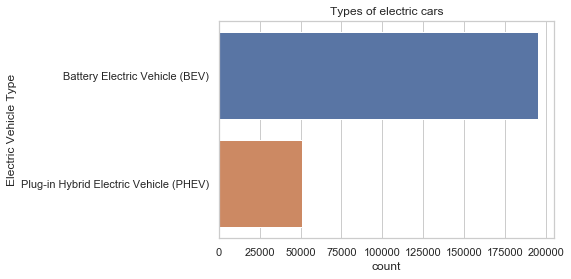

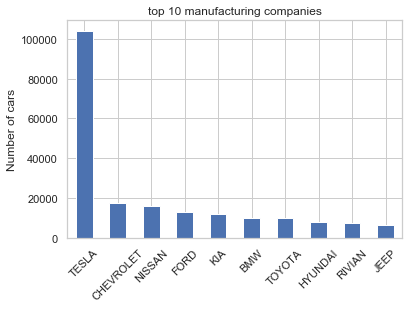

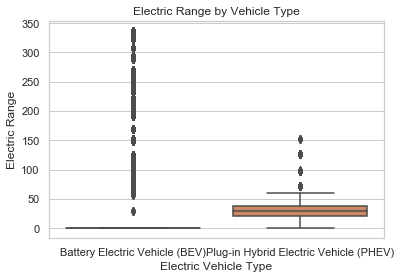

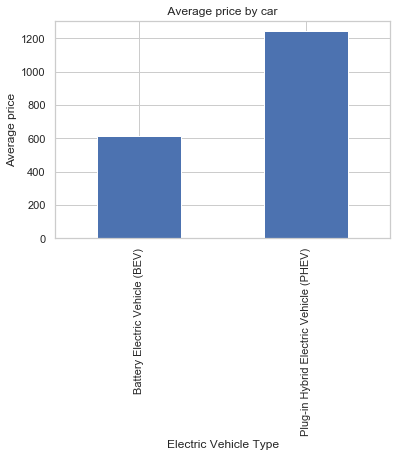

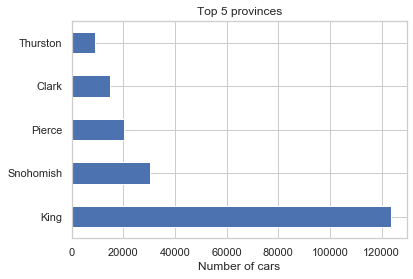

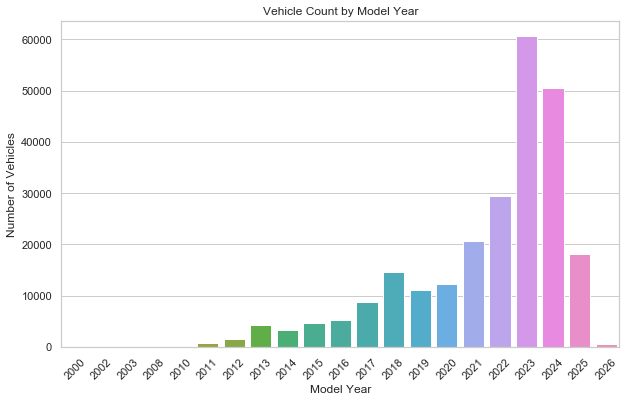

Top 5 Makes:
 TESLA        104098
CHEVROLET     17771
NISSAN        15772
FORD          13158
KIA           12019
Name: Make, dtype: int64
Top 5 Counties:
 King         123557
Snohomish     30203
Pierce        20254
Clark         14810
Thurston       8938
Name: County, dtype: int64
Average Electric Range by Model:
 Model
ROADSTER    230.434783
I-PACE      189.191489
BOLT EV     168.186245
MODEL S     167.959285
MACAN       149.372781
E-TRON      129.033898
MODEL X     119.344389
E-GOLF      107.473978
RAV4        102.578947
CITY        100.000000
Name: Electric Range, dtype: float64
Average MSRP by EV Type:
 Electric Vehicle Type
Battery Electric Vehicle (BEV)             616.017618
Plug-in Hybrid Electric Vehicle (PHEV)    1244.152426
Name: Base MSRP, dtype: float64


In [5]:


# This project analyzes a real-world dataset of electric vehicles registered in Washington state.
# The dataset is cleaned, explored, and visualized to extract meaningful insights.


# Load Data and Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns', None)
sns.set(style='whitegrid')
file_path = r"C:\Users\anallam\Desktop\Electric_Vehicle_Population_Data.csv"
df = pd.read_csv(file_path)
df.head()

# Data Overview
df.info()
df.isnull().sum()

# Data Cleaning
df.dropna(subset=['County', 'City', 'Electric Vehicle Type', 'Make'], inplace=True)
df.reset_index(drop=True, inplace=True)

# Analysis
sns.countplot(data=df, y='Electric Vehicle Type', order=df['Electric Vehicle Type'].value_counts().index)
plt.title('Types of electric cars') # Type of car  
plt.show()

df['Make'].value_counts().head(10).plot(kind='bar', title='top 10 manufacturing companies')
plt.ylabel('Number of cars')
plt.xticks(rotation=45)
plt.show()

sns.boxplot(data=df, x='Electric Vehicle Type', y='Electric Range')
plt.title('Electric Range by Vehicle Type')
plt.show()
df.groupby('Electric Vehicle Type')['Base MSRP'].mean().plot(kind='bar', title=' Average price by car ')
plt.ylabel('Average price')
plt.show()

df['County'].value_counts().head(5).plot(kind='barh', title='Top 5 provinces')
plt.xlabel('Number of cars')
plt.show()

# Model Year
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Model Year', order=sorted(df['Model Year'].dropna().unique()))
plt.title('Vehicle Count by Model Year')
plt.xticks(rotation=45)
plt.ylabel('Number of Vehicles')
plt.xlabel('Model Year')
plt.show()


print("Top 5 Makes:\n", df['Make'].value_counts().head(5))
print("Top 5 Counties:\n", df['County'].value_counts().head(5))
print("Average Electric Range by Model:\n", df.groupby('Model')['Electric Range'].mean().sort_values(ascending=False).head(10))
print("Average MSRP by EV Type:\n", df.groupby('Electric Vehicle Type')['Base MSRP'].mean())







In [ ]:
# 1 Tesla is the most common electric vehicle manufacturer in the dataset, dominating the registrations
# 2 Battery Electric Vehicles (BEV) generally have a much higher electric range compared to Plug-in Hybrid Electric Vehicles (PHEV).
# 3 Most electric vehicle registrations are concentrated in major counties like King County
# 4 The Base MSRP (price) is significantly higher for BEVs, reflecting their longer range and more advanced technology. 
# 5 There is a clear variation in electric range across different car models, with some models offering over 300 miles, while others offer very limited range.
# 6 Electric utility companies vary widely, and some are associated with specific counties or regions.

